In [ ]:
%pip install torch sentence-transformers matplotlib

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example words
words = ['king', 'queen', 'man', 'woman']

# Generate embeddings
embeddings = model.encode(words)

print("Word Embeddings Shape:", embeddings.shape)

/home/khushwant/miniconda3/envs/torch/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Word Embeddings Shape: (4, 384)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_closest(embedding, embeddings, words):
    similarities = cosine_similarity([embedding], embeddings)[0]
    closest_idx = np.argsort(similarities)[::-1]
    return [(words[i], similarities[i]) for i in closest_idx]

# Vector Arithmetic: king - man + woman
king, man, woman = embeddings[0], embeddings[2], embeddings[3]
new_vector = king - man + woman

# Find closest word
results = find_closest(new_vector, embeddings, words)
print("Closest words to king - man + woman:", results)

Closest words to king - man + woman: [('king', np.float32(0.63057125)), ('woman', np.float32(0.6278732)), ('queen', np.float32(0.57947874)), ('man', np.float32(-0.23599245))]


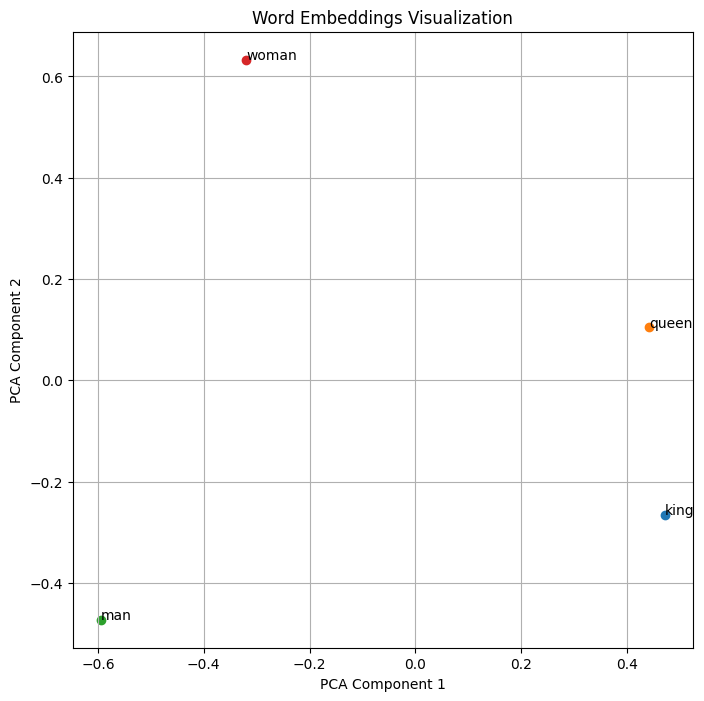

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()